
# Project: TMDB Movie Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> For this analysis I am utilizing TMDB data to understand what factors are correlated to movies' successes and if these have changed over the past few years. 


> Key Questions:   
> What have the average revenues (adjusted for inflation) looked like over the dataset?   
> What has average popularity done over time?   
> Has average runtime increased or decreased over the years?   
> What are the highest revenue producing movies?  
> Are revenues and runtimes correlated?   
> Are revenues and popularity correlated?   
> Which director(s) have been most successful in terms of revenue and popularity?   
> Which cast(s) have been most successful in terms of revenue and popularity?    



In [265]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Inspecting data and understanding if any changes are needed. 

### General Properties

In [253]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
df.drop(['tagline', 'homepage', 'keywords', 'overview'], axis=1, inplace=True)

In [ ]:
df.drop_duplicates(keep ='first', inplace=True)

In [ ]:
df.hist(figsize=(15,10));


### Data Cleaning


> Now that we have dropped duplicate rows, there are a few other items that we need to address.  Three columns have data that is separated by '|' and it might be helpful to split these data up into separate columns. These columns are 'Cast', 'Production_Companies', and Generes.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df[['Actor1', 'Actor2', 'Actor3', 'Actor4', 'Actor5']] = df.cast.str.split('|', expand=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,Actor1,Actor2,Actor3,Actor4,Actor5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [9]:
df[['Prod_Co1','Prod_Co2','Prod_Co3','Prod_Co4', 'Prod_Co5']] = df.production_companies.str.split('|', expand=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,...,Actor1,Actor2,Actor3,Actor4,Actor5,Prod_Co1,Prod_Co2,Prod_Co3,Prod_Co4,Prod_Co5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,...,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,...,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,...,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,...,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley,Lucasfilm,Truenorth Productions,Bad Robot,None,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,...,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson,Universal Pictures,Original Film,Media Rights Capital,Dentsu,One Race Films


In [143]:
df[['Genre1','Genre2','Genre3','Genre4', 'Genre5']] = df.genres.str.split('|', expand=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre1,Genre2,Genre3,Genre4,Genre5
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [110]:
df.drop(['cast', 'genres', 'production_companies'], axis=1, inplace=True)

In [111]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,tagline,keywords,overview,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What are the revenue and popularity trends?

Text(0,0.5,'Revenue')

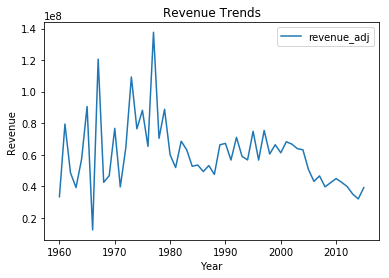

In [184]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

# Have average revenues increased over the years?

df_avg = pd.pivot_table(df, index=['release_year'], values=['revenue_adj'], aggfunc=('mean')).plot()

plt.xlabel('Year')
plt.title('Revenue Trends')
plt.ylabel('Revenue')





Text(0,0.5,'Popularity')

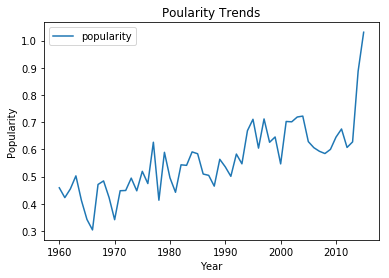

In [178]:
# Has average popularity increased over the years?

pd.pivot_table(df, index=['release_year'], values=['popularity'], aggfunc=('mean')).plot()

plt.xlabel('Year')
plt.title('Poularity Trends');
plt.ylabel('Popularity')


Text(0,0.5,'Runtime')

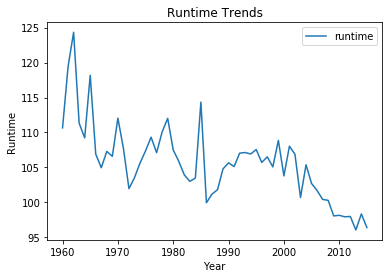

In [202]:
# Has average popularity increased over the years?

pd.pivot_table(df, index=['release_year'], values=['runtime'], aggfunc=('mean')).plot()

plt.xlabel('Year')
plt.title('Runtime Trends');
plt.ylabel('Runtime')


In [210]:
# Who are the top 5 most revenue generating director(s)?

df_dir = pd.pivot_table(df, index=['director'], values=['revenue_adj'], aggfunc=('sum'))
df_dir_sorted = df_dir.sort_values('revenue_adj',axis=0,ascending=False)
df_dir_sorted.head(5)




,revenue_adj
director,
Steven Spielberg,1.520245e+10
James Cameron,7.327221e+09
Peter Jackson,7.019848e+09
George Lucas,6.313919e+09
Robert Zemeckis,5.655648e+09


In [222]:
# Who are the directors with the top 5 most popular movies?

df_dir_pop = pd.pivot_table(df, index=['director'], values=['popularity'], aggfunc=('sum'))
df_dir_pop_sorted = df_dir_pop.sort_values('popularity',axis=0,ascending=False)
df_dir_pop_sorted.head(5)


,popularity
director,
Christopher Nolan,61.955206
Steven Spielberg,54.378995
Peter Jackson,49.067904
Ridley Scott,46.213770
Quentin Tarantino,46.059995


In [223]:
# Who are the top 5 most revenue generating cast(s)?

df_cast = pd.pivot_table(df, index=['cast'], values=['revenue_adj'], aggfunc=('sum'))
df_cast_sorted = df_cast.sort_values('revenue_adj',axis=0,ascending=False)
df_cast_sorted.head(5)


,revenue_adj
cast,
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom,3.522260e+09
Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez,2.827124e+09
Mark Hamill|Harrison Ford|Carrie Fisher|Peter Cushing|Alec Guinness,2.789712e+09
Mark Hamill|Harrison Ford|Carrie Fisher|Billy Dee Williams|Anthony Daniels,2.678445e+09
Kate Winslet|Leonardo DiCaprio|Frances Fisher|Billy Zane|Kathy Bates,2.506406e+09


In [323]:
# Which casts are the most popular?

df_cast_pop = pd.pivot_table(df, index=['cast'], values=['popularity'], aggfunc=('sum'))
df_cast_pop_sort = df_cast_pop.sort_values('popularity',axis=0,ascending=False)
df_cast_pop_sort.head(5)


,popularity
cast,
Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson,32.985763
Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman,28.419936
Matthew McConaughey|Jessica Chastain|Anne Hathaway|Michael Caine|Casey Affleck,24.949134
Elijah Wood|Ian McKellen|Viggo Mortensen|Liv Tyler|Orlando Bloom,23.793149
Martin Freeman|Ian McKellen|Richard Armitage|Ken Stott|Graham McTavish,14.485385


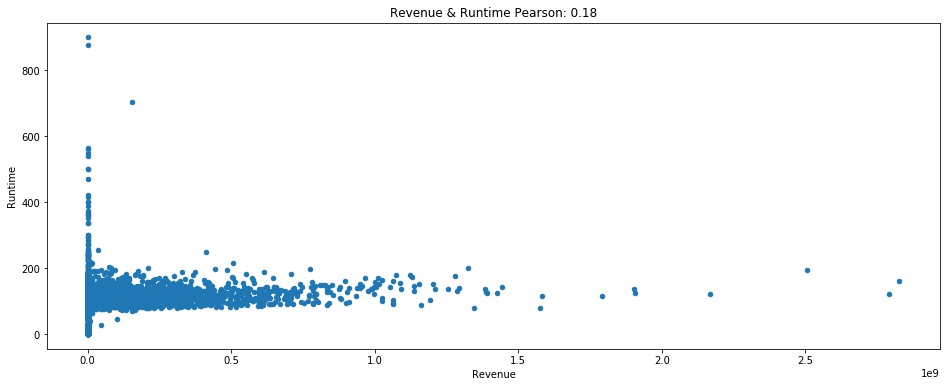

In [321]:
# Are runtime and revenues correlated?
# 

df_adj = df[['revenue_adj', 'runtime']]
plt.rcParams['figure.figsize'] = [16, 6]

ax = df.plot.scatter('revenue_adj','runtime')
plt.ylabel('Runtime')
plt.xlabel('Revenue')
ax.set_title('Revenue & Runtime Pearson: %s'%df_adj.corr().loc['revenue_adj']['runtime'].round(2))
    

plt.show()

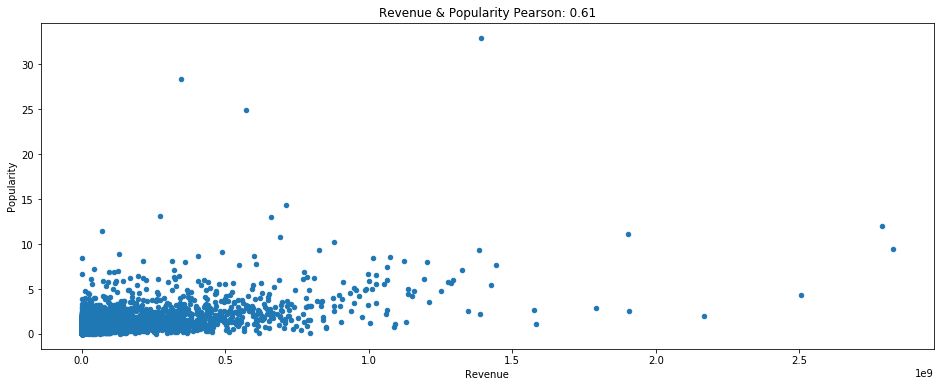

In [320]:
# Are revenues and popularity correlated?

df_adj = df[['revenue_adj', 'popularity']]
plt.rcParams['figure.figsize'] = [16, 6]

ax = df.plot.scatter('revenue_adj','popularity')
plt.ylabel('Popularity')
plt.xlabel('Revenue')
ax.set_title('Revenue & Popularity Pearson: %s'%df_adj.corr().loc['revenue_adj']['popularity'].round(2))
    

plt.show()

In [227]:
# What are the top five most revenue generating movies of all time?

df.nlargest(5, 'revenue_adj', keep='first')



,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,Genre1,Genre2,Genre3,Genre4,Genre5
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,...,8458,7.1,2009,2.408869e+08,2.827124e+09,Action,Adventure,Fantasy,Science Fiction,None
1329,11,tt0076759,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,...,4428,7.9,1977,3.957559e+07,2.789712e+09,Adventure,Action,Science Fiction,None,None
5231,597,tt0120338,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,...,4654,7.3,1997,2.716921e+08,2.506406e+09,Drama,Romance,Thriller,None,None
10594,9552,tt0070047,2.010733,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122,Drama|Horror|Thriller,...,1113,7.2,1973,3.928928e+07,2.167325e+09,Drama,Horror,Thriller,None,None
9806,578,tt0073195,2.563191,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124,Horror|Thriller|Adventure,...,1415,7.3,1975,2.836275e+07,1.907006e+09,Horror,Thriller,Adventure,None,None


<a id='conclusions'></a>
## Conclusions

> KEY TAKEAWAYS:

>Average revenues and runtimes have declined over the past 55 years while average popularity has increased. 

>Revenues and popularity are more strongly correlated (0.61) than revenue and runtimes (0.18).   

>The most successful directors, in terms of revenue and popularity, are not a team of directors.

>Contrary to some hypotheses, more recent movies do not generate more revenue than older movies (inflation adjusted).

>The most popular directors and casts are not always the most revenue generating.

